# Tugas Praktikum


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

        i. Gunakan model dengan kernel linier.
        ii. Gunakan model dengan kernel polynomial.
        iii. Gunakan model dengan kernel RBF.

    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

## Soal 1: SVM dengan Data voice.csv

In [37]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load data voice.csv
df = pd.read_csv('voice.csv')
print(f"Shape data: {df.shape}")
print(f"\nInfo data:")
print(df.info())
print(f"\nSample data:")
df.head()

Shape data: (3168, 21)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [39]:
# Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# Encode label jika berupa string
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Kelas target: {le.classes_}")

Jumlah fitur: 20
Kelas target: ['female' 'male']


In [40]:
# Definisikan split ratios dan kernels
split_ratios = [0.7, 0.8]  # 70:30 dan 80:20
kernels = ['linear', 'poly', 'rbf']

# Dictionary untuk menyimpan hasil
results = []

# Loop untuk setiap kombinasi split ratio dan kernel
for split_ratio in split_ratios:
    test_size = 1 - split_ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, train_size=split_ratio, random_state=42
    )
    
    print(f"\n{'='*60}")
    print(f"Split Ratio: {int(split_ratio*100)}:{int(test_size*100)}")
    print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
    print(f"{'='*60}")
    
    for kernel in kernels:
        print(f"\nTraining SVM with {kernel} kernel...")
        
        # Buat dan latih model SVM
        if kernel == 'poly':
            svm_model = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            svm_model = SVC(kernel=kernel, random_state=42)
        
        svm_model.fit(X_train, y_train)
        
        # Prediksi dan hitung akurasi
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Simpan hasil
        results.append({
            'Split Ratio': f"{int(split_ratio*100)}:{int(test_size*100)}",
            'Kernel': kernel,
            'Accuracy': accuracy
        })
        
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Split Ratio: 70:30
Training samples: 2217, Testing samples: 951

Training SVM with linear kernel...
Accuracy: 0.9264 (92.64%)

Training SVM with poly kernel...
Accuracy: 0.9264 (92.64%)

Training SVM with poly kernel...
Accuracy: 0.4900 (49.00%)

Training SVM with rbf kernel...
Accuracy: 0.6625 (66.25%)

Split Ratio: 80:19
Training samples: 2534, Testing samples: 634

Training SVM with linear kernel...
Accuracy: 0.4900 (49.00%)

Training SVM with rbf kernel...
Accuracy: 0.6625 (66.25%)

Split Ratio: 80:19
Training samples: 2534, Testing samples: 634

Training SVM with linear kernel...
Accuracy: 0.9416 (94.16%)

Training SVM with poly kernel...
Accuracy: 0.9416 (94.16%)

Training SVM with poly kernel...
Accuracy: 0.4826 (48.26%)

Training SVM with rbf kernel...
Accuracy: 0.6562 (65.62%)
Accuracy: 0.4826 (48.26%)

Training SVM with rbf kernel...
Accuracy: 0.6562 (65.62%)


In [41]:
# Buat tabel hasil performansi
results_df = pd.DataFrame(results)

# Pivot table untuk tampilan yang lebih baik
pivot_table = results_df.pivot(index='Split Ratio', columns='Kernel', values='Accuracy')

print("\n" + "="*60)
print("TABEL PERFORMANSI MODEL SVM")
print("="*60)
print(pivot_table)
print("\n")

# Tampilkan statistik tambahan
print("\nRingkasan Performansi:")
print(f"Akurasi Tertinggi: {results_df['Accuracy'].max():.4f}")
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Model Terbaik: {best_model['Kernel']} kernel dengan split {best_model['Split Ratio']}")
print(f"\nAkurasi Terendah: {results_df['Accuracy'].min():.4f}")
worst_model = results_df.loc[results_df['Accuracy'].idxmin()]
print(f"Model Terburuk: {worst_model['Kernel']} kernel dengan split {worst_model['Split Ratio']}")


TABEL PERFORMANSI MODEL SVM
Kernel         linear      poly       rbf
Split Ratio                              
70:30        0.926393  0.490011  0.662461
80:19        0.941640  0.482650  0.656151



Ringkasan Performansi:
Akurasi Tertinggi: 0.9416
Model Terbaik: linear kernel dengan split 80:19

Akurasi Terendah: 0.4826
Model Terburuk: poly kernel dengan split 80:19


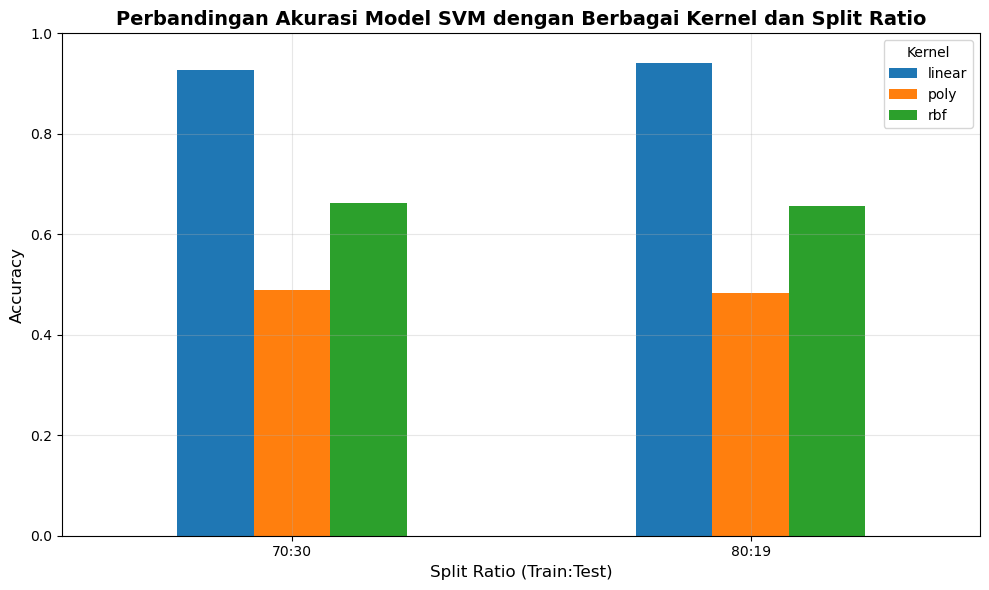

In [42]:
# Visualisasi hasil (opsional)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=ax)
ax.set_title('Perbandingan Akurasi Model SVM dengan Berbagai Kernel dan Split Ratio', fontsize=14, fontweight='bold')
ax.set_xlabel('Split Ratio (Train:Test)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_ylim([0, 1])
ax.legend(title='Kernel', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Soal 2: Klasifikasi Siang dan Malam dengan SVM RBF

In [43]:
# Import library tambahan untuk pengolahan gambar
import cv2
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Fungsi untuk ekstraksi fitur histogram dari gambar
def extract_histogram_features(image_path, bins=256):
    """
    Ekstraksi fitur histogram dari gambar
    Args:
        image_path: path ke file gambar
        bins: jumlah bins untuk histogram (default 256)
    Returns:
        flattened histogram sebagai feature vector
    """
    # Baca gambar
    img = cv2.imread(image_path)
    
    # Konversi ke HSV untuk fitur warna yang lebih baik
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Hitung histogram untuk setiap channel
    hist_h = cv2.calcHist([img_hsv], [0], None, [bins], [0, 180])
    hist_s = cv2.calcHist([img_hsv], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([img_hsv], [2], None, [bins], [0, 256])
    
    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()
    
    # Gabungkan semua histogram
    features = np.concatenate([hist_h, hist_s, hist_v])
    
    return features

# Fungsi untuk load dataset dari folder
def load_dataset(base_path, bins=256):
    """
    Load dataset dari folder training dan test
    Args:
        base_path: path ke folder images
        bins: jumlah bins untuk histogram
    Returns:
        X_train, X_test, y_train, y_test
    """
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    # Load training data
    train_path = os.path.join(base_path, 'training')
    for class_name in ['day', 'night']:
        class_path = os.path.join(train_path, class_name)
        label = 1 if class_name == 'day' else 0
        
        if os.path.exists(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    features = extract_histogram_features(img_path, bins)
                    X_train.append(features)
                    y_train.append(label)
    
    # Load test data
    test_path = os.path.join(base_path, 'test')
    for class_name in ['day', 'night']:
        class_path = os.path.join(test_path, class_name)
        label = 1 if class_name == 'day' else 0
        
        if os.path.exists(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    features = extract_histogram_features(img_path, bins)
                    X_test.append(features)
                    y_test.append(label)
    
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

print("Fungsi ekstraksi fitur histogram berhasil didefinisikan!")

Fungsi ekstraksi fitur histogram berhasil didefinisikan!


In [45]:
# Load dataset
base_path = 'images'  # Sesuaikan dengan path folder Anda

print("Loading dataset...")
X_train, X_test, y_train, y_test = load_dataset(base_path, bins=256)

print(f"\nDataset berhasil dimuat!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Jumlah fitur: {X_train.shape[1]}")
print(f"\nDistribusi kelas training:")
print(f"  Night (0): {np.sum(y_train == 0)}")
print(f"  Day (1): {np.sum(y_train == 1)}")
print(f"\nDistribusi kelas testing:")
print(f"  Night (0): {np.sum(y_test == 0)}")
print(f"  Day (1): {np.sum(y_test == 1)}")

Loading dataset...

Dataset berhasil dimuat!
Training samples: 240
Testing samples: 160
Jumlah fitur: 768

Distribusi kelas training:
  Night (0): 120
  Day (1): 120

Distribusi kelas testing:
  Night (0): 80
  Day (1): 80

Dataset berhasil dimuat!
Training samples: 240
Testing samples: 160
Jumlah fitur: 768

Distribusi kelas training:
  Night (0): 120
  Day (1): 120

Distribusi kelas testing:
  Night (0): 80
  Day (1): 80


In [46]:
# Model 1: SVM RBF dengan parameter default
print("="*60)
print("MODEL 1: SVM RBF dengan Parameter Default")
print("="*60)

svm_default = SVC(kernel='rbf', random_state=42)
svm_default.fit(X_train, y_train)

y_pred_default = svm_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"\nAkurasi Model Default: {accuracy_default:.4f} ({accuracy_default*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default, target_names=['Night', 'Day']))

MODEL 1: SVM RBF dengan Parameter Default

Akurasi Model Default: 0.9938 (99.38%)

Classification Report:
              precision    recall  f1-score   support

       Night       0.99      1.00      0.99        80
         Day       1.00      0.99      0.99        80

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [47]:
# Model 2: SVM RBF dengan Hyperparameter Tuning menggunakan GridSearchCV
print("\n" + "="*60)
print("MODEL 2: SVM RBF dengan Hyperparameter Tuning")
print("="*60)

# Definisikan parameter grid untuk tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print("\nMelakukan Grid Search untuk mencari hyperparameter terbaik...")
print(f"Parameter grid: {param_grid}")

# GridSearchCV dengan cross-validation
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluasi model terbaik pada test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"\nAkurasi Model Tuned pada Test Set: {accuracy_tuned:.4f} ({accuracy_tuned*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Night', 'Day']))


MODEL 2: SVM RBF dengan Hyperparameter Tuning

Melakukan Grid Search untuk mencari hyperparameter terbaik...
Parameter grid: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.9958

Akurasi Model Tuned pada Test Set: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

       Night       1.00      1.00      1.00        80
         Day       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.9958

Akurasi Model Tuned pada Test Set: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

       Night       1.00      1.00      1.00   

In [48]:
# Model 3: Eksperimen dengan beberapa kombinasi hyperparameter manual
print("\n" + "="*60)
print("MODEL 3: Eksperimen Manual dengan Berbagai Hyperparameter")
print("="*60)

# Kombinasi hyperparameter untuk eksperimen
experiments = [
    {'C': 1, 'gamma': 0.001},
    {'C': 10, 'gamma': 0.01},
    {'C': 100, 'gamma': 0.1},
    {'C': 50, 'gamma': 0.05},
]

experiment_results = []

for i, params in enumerate(experiments, 1):
    print(f"\nEksperimen {i}: C={params['C']}, gamma={params['gamma']}")
    
    model = SVC(kernel='rbf', C=params['C'], gamma=params['gamma'], random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    experiment_results.append({
        'Experiment': f"Exp {i}",
        'C': params['C'],
        'gamma': params['gamma'],
        'Accuracy': accuracy
    })
    
    print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Tampilkan ringkasan eksperimen
exp_df = pd.DataFrame(experiment_results)
print("\n" + "="*60)
print("RINGKASAN EKSPERIMEN")
print("="*60)
print(exp_df.to_string(index=False))


MODEL 3: Eksperimen Manual dengan Berbagai Hyperparameter

Eksperimen 1: C=1, gamma=0.001
Akurasi: 0.8375 (83.75%)

Eksperimen 2: C=10, gamma=0.01
Akurasi: 0.9750 (97.50%)

Eksperimen 3: C=100, gamma=0.1
Akurasi: 1.0000 (100.00%)

Eksperimen 4: C=50, gamma=0.05
Akurasi: 1.0000 (100.00%)

RINGKASAN EKSPERIMEN
Experiment   C  gamma  Accuracy
     Exp 1   1  0.001    0.8375
     Exp 2  10  0.010    0.9750
     Exp 3 100  0.100    1.0000
     Exp 4  50  0.050    1.0000


In [49]:
# Perbandingan semua model
print("\n" + "="*60)
print("PERBANDINGAN SEMUA MODEL")
print("="*60)

comparison_results = pd.DataFrame([
    {'Model': 'SVM RBF Default', 'C': 1.0, 'gamma': 'scale', 'Accuracy': accuracy_default},
    {'Model': 'SVM RBF Tuned (GridSearch)', 'C': grid_search.best_params_['C'], 
     'gamma': grid_search.best_params_['gamma'], 'Accuracy': accuracy_tuned}
])

print(comparison_results.to_string(index=False))

print(f"\n{'='*60}")
print("KESIMPULAN:")
print(f"{'='*60}")
print(f"Model terbaik: SVM RBF Tuned dengan C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print(f"Akurasi terbaik: {accuracy_tuned:.4f} ({accuracy_tuned*100:.2f}%)")
print(f"Peningkatan dari model default: {(accuracy_tuned - accuracy_default)*100:.2f}%")


PERBANDINGAN SEMUA MODEL
                     Model    C gamma  Accuracy
           SVM RBF Default  1.0 scale   0.99375
SVM RBF Tuned (GridSearch) 10.0   0.1   1.00000

KESIMPULAN:
Model terbaik: SVM RBF Tuned dengan C=10, gamma=0.1
Akurasi terbaik: 1.0000 (100.00%)
Peningkatan dari model default: 0.62%


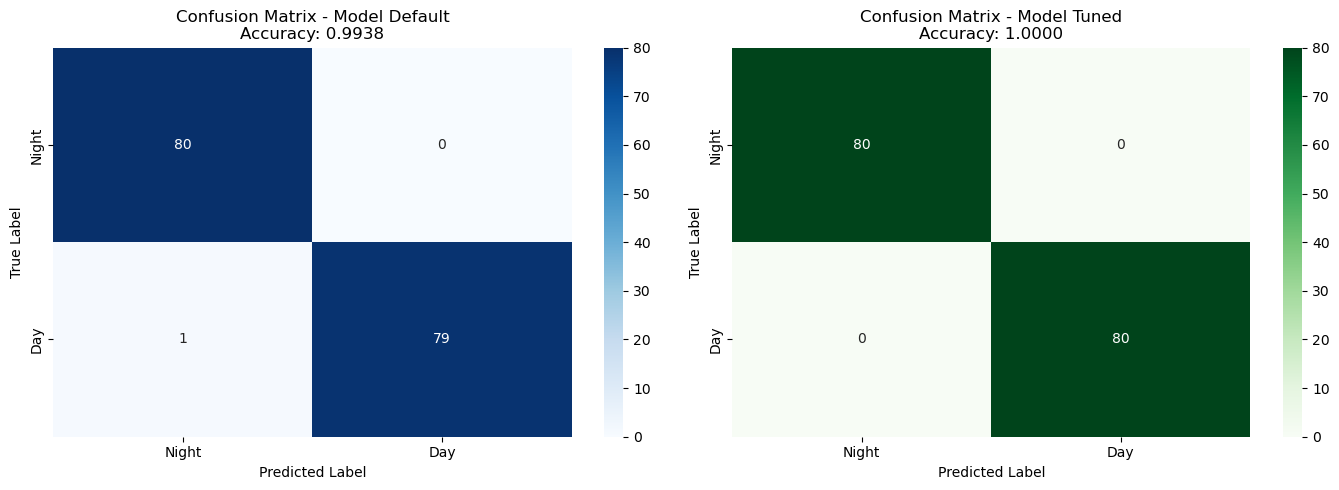

In [50]:
# Visualisasi Confusion Matrix untuk model terbaik
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - Model Default
cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Night', 'Day'], yticklabels=['Night', 'Day'])
axes[0].set_title(f'Confusion Matrix - Model Default\nAccuracy: {accuracy_default:.4f}')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix - Model Tuned
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Night', 'Day'], yticklabels=['Night', 'Day'])
axes[1].set_title(f'Confusion Matrix - Model Tuned\nAccuracy: {accuracy_tuned:.4f}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

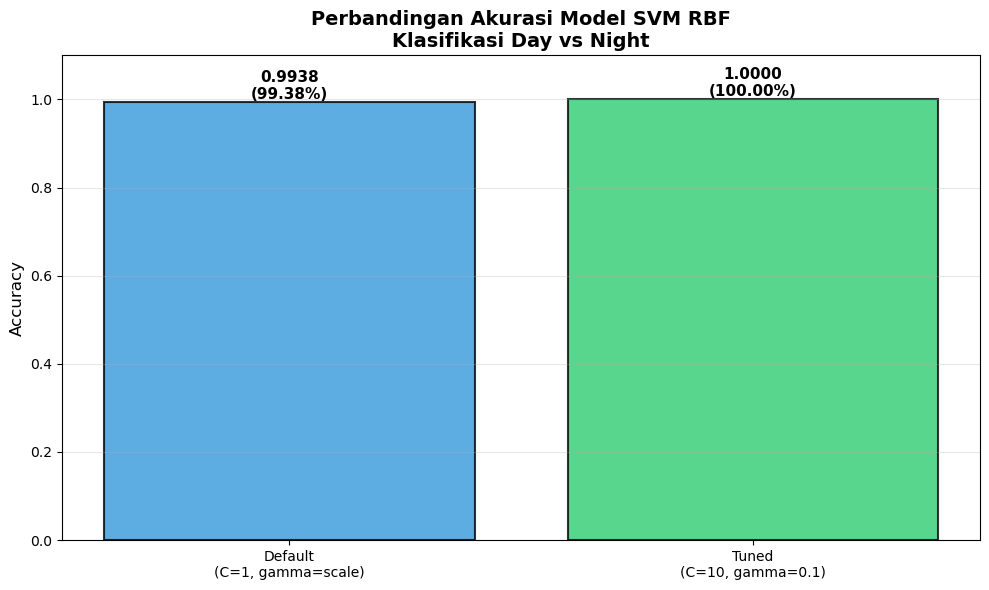

In [51]:
# Visualisasi perbandingan akurasi
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Default\n(C=1, gamma=scale)', 
          f'Tuned\n(C={grid_search.best_params_["C"]}, gamma={grid_search.best_params_["gamma"]})']
accuracies = [accuracy_default, accuracy_tuned]
colors = ['#3498db', '#2ecc71']

bars = ax.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}\n({acc*100:.2f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Perbandingan Akurasi Model SVM RBF\nKlasifikasi Day vs Night', 
             fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()